# Project 1 - Survey Analysis

### This analysis uses data of the survey on StackOverflow for the years 2017 to 2020 
- The data consists of various numeric and categorical variables which differ between the surveys over the years. The analysis gives a small insight into the demography of the participants.
### We are interested in following questions:
- 1. Do people from a certain country are more interested in the survey and does the trend change over the years?
- 2. Do people of a certain gender are more interested in the survey and does the trend change?
- 3. Do people work more in different countries in 2020?
- 4. How is the age demographics in different countries in 2020?


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import functions as fun
%matplotlib inline

path = os.getcwd()

## Gather
- The data was gathered from the link provided by Udacity

In [2]:
# Read in the data with a self-written function "read_survey"
df_2017 = fun.read_survey(path,'2017')
df_2018 = fun.read_survey(path,'2018')
df_2019 = fun.read_survey(path,'2019')
df_2020 = fun.read_survey(path,'2020')


## Assess

In [3]:
# Have a first look
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Have a first look
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [5]:
# Have a first look
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [6]:
# Have a first look
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
col_2017 = df_2017.columns.values
col_2018 = df_2018.columns.values
col_2019 = df_2019.columns.values
col_2020 = df_2020.columns.values

In [8]:
# Get the intersecting columns of all datasets to see which variable should be taken into account for a comparison between the years
intersecting_columns = set(col_2017) & set(col_2018) & set(col_2019) & set(col_2020)
intersecting_columns

{'Country', 'Gender', 'Respondent'}

## Clean Data

In [9]:
# Drop all NaN values from all datasets to clean out the dataset
# Because there is no intention of predicting, imputation is unnecessery, because it would influence the analysis
df_2017.dropna(axis=0)
df_2018.dropna(axis=0)
df_2019.dropna(axis=0)
df_2020.dropna(axis=0)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
32,33,I am a developer by profession,Yes,39.0,14,Monthly,4900.0,63564.0,Belgium,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Ruby on Rails,Angular;Angular.js;Django;Express;React.js,Just as welcome now as I felt last year,40.0,20,14
41,42,I am a developer by profession,No,32.0,14,Yearly,130000.0,130000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;Spring,ASP.NET;Flask;React.js;Spring,Somewhat less welcome now than last year,37.0,16,10
46,47,I am a developer by profession,Yes,53.0,10,Yearly,58000.0,74970.0,United Kingdom,Pound sterling,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43,28
68,69,I am a developer by profession,Yes,25.0,12,Yearly,550000.0,594539.0,France,European Euro,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61613,62863,I am a developer by profession,Yes,30.0,11,Yearly,230000.0,230000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular;Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,10,7
61636,62886,I am a developer by profession,Yes,32.0,24,Yearly,102700.0,102700.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular,Angular;Angular.js;ASP.NET Core,Somewhat more welcome now than last year,45.0,7,5
61654,62904,I am a developer by profession,Yes,33.0,24,Yearly,95000.0,95000.0,United States,United States dollar,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;Laravel;React.js;Vue.js,Just as welcome now as I felt last year,50.0,9,7
61993,63288,I am a developer by profession,No,31.0,16,Yearly,65000.0,84019.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Angular.js;Express,Angular;Angular.js;Express,Just as welcome now as I felt last year,40.0,14,7


## Explanatory Analysis

### Q1: Do people from a certain country are more interested in the survey and does the trend change over the years?

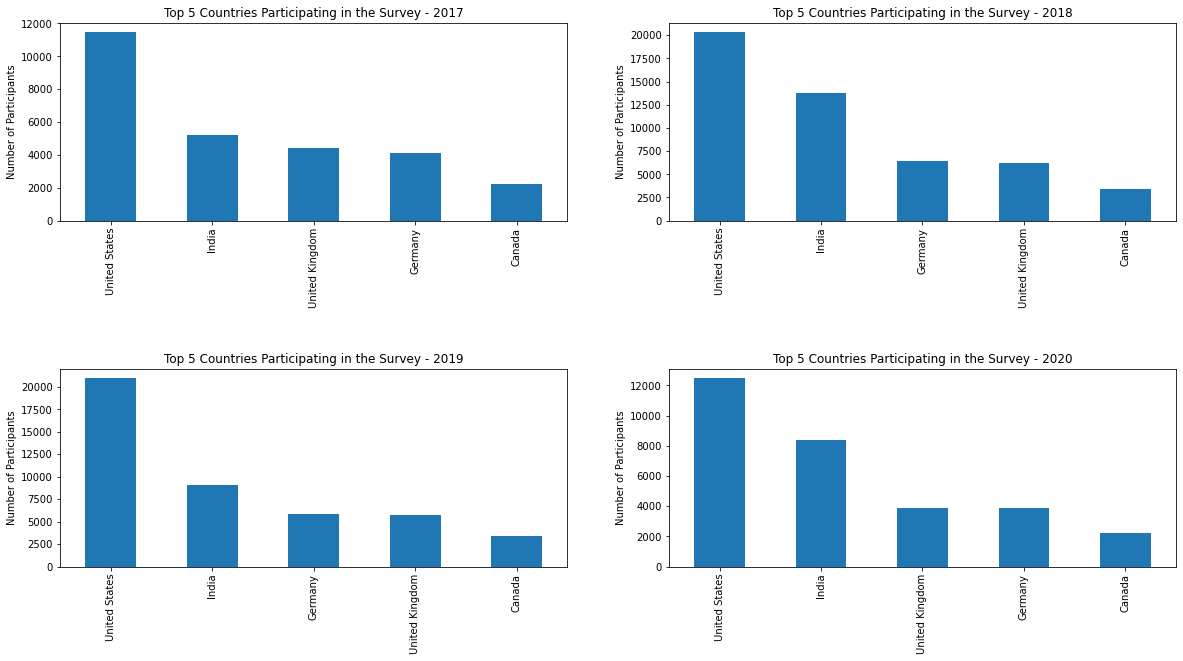

In [10]:
# Create folder 'results' if it is not already existent
if not os.path.exists(path+'/results'):
    os.makedirs(path+'/results')

# Set up a figure
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Set up subplots
plt.subplot(2, 2, 1)
(df_2017['Country'].value_counts()).sort_values(ascending=False)[:5].plot.bar()
plt.title('Top 5 Countries Participating in the Survey - 2017')
plt.ylabel('Number of Participants')

plt.subplot(2, 2, 2)
(df_2018['Country'].value_counts()).sort_values(ascending=False)[:5].plot.bar()
plt.title('Top 5 Countries Participating in the Survey - 2018')
plt.ylabel('Number of Participants')

plt.subplot(2, 2, 3)
(df_2019['Country'].value_counts()).sort_values(ascending=False)[:5].plot.bar()
plt.title('Top 5 Countries Participating in the Survey - 2019')
plt.ylabel('Number of Participants')

plt.subplot(2, 2, 4)
(df_2020['Country'].value_counts()).sort_values(ascending=False)[:5].plot.bar()
plt.title('Top 5 Countries Participating in the Survey - 2020')
plt.ylabel('Number of Participants')

plt.savefig('results/Country_comparison.png')
plt.show()


The United States have the highest number of participants over years. The second most participants in the survey come from India. This trend does also not change over the years. The third place is a fight between the United Kingom and Germany. In the year 2017 more participants come from the United Kingdom but the following two years Germany is on place three. This changed again in 2020, so actually the United Kingdom resides on the third place. Canada is steady on the fourth place.

## Q2: Do people of a certain gender are more interested in the survey and does the ttrend change?

In [11]:
# Check for unique values of gender
print (" Number of unique possible values for Gender in 2017: {} ".format(df_2017['Gender'].nunique()))
print (" Number of unique possible values for Gender in 2018: {} ".format(df_2018['Gender'].nunique()))
print (" Number of unique possible values for Gender in 2019: {} ".format(df_2019['Gender'].nunique()))
print (" Number of unique possible values for Gender in 2020: {} ".format(df_2020['Gender'].nunique()))

 Number of unique possible values for Gender in 2017: 29 
 Number of unique possible values for Gender in 2018: 15 
 Number of unique possible values for Gender in 2019: 7 
 Number of unique possible values for Gender in 2020: 7 


The trend shows that the possible answers were reducced in the surveys over the years. To better visualise the trend, the gender variable will be categorised into 3 values: Male, Female, Other.

In [12]:
# Convert the gender with the function 'gender_conversion'
df_2017 = fun.gender_conversion(df_2017)
df_2018 = fun.gender_conversion(df_2018)
df_2019 = fun.gender_conversion(df_2019)
df_2020 = fun.gender_conversion(df_2020)


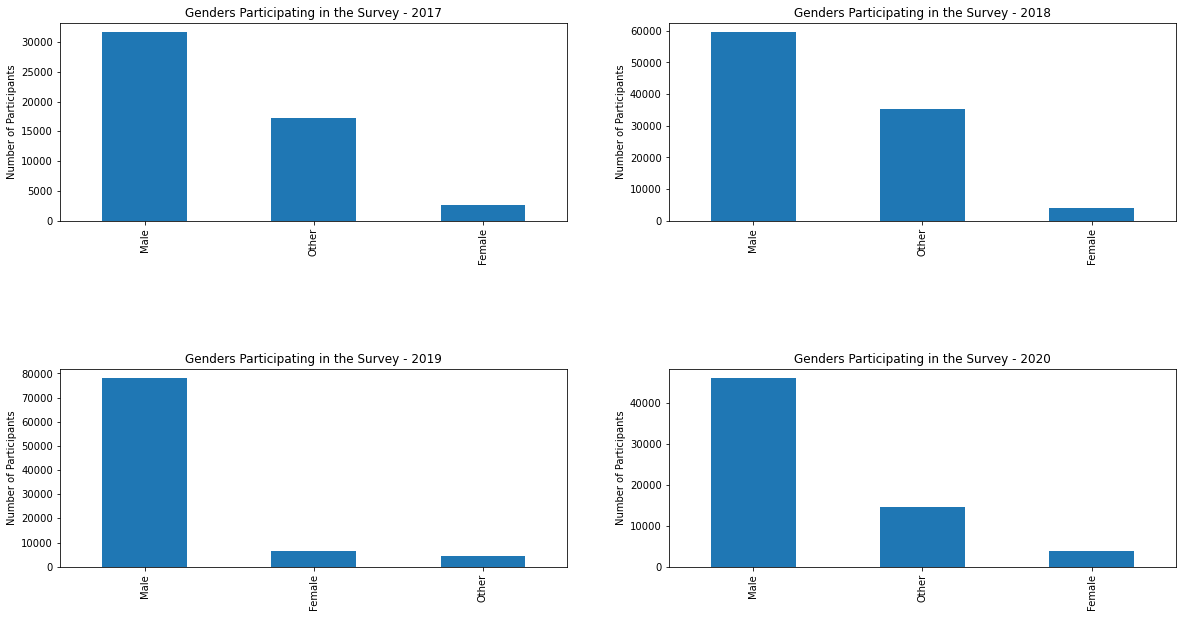

In [13]:
# Set up a figure
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Set up subplots
plt.subplot(2, 2, 1)
(df_2017['Gender2'].value_counts()).sort_values(ascending=False).plot.bar()
plt.title('Genders Participating in the Survey - 2017')
plt.ylabel('Number of Participants')

plt.subplot(2, 2, 2)
(df_2018['Gender2'].value_counts()).sort_values(ascending=False).plot.bar()
plt.title('Genders Participating in the Survey - 2018')
plt.ylabel('Number of Participants')

plt.subplot(2, 2, 3)
(df_2019['Gender2'].value_counts()).sort_values(ascending=False).plot.bar()
plt.title('Genders Participating in the Survey - 2019')
plt.ylabel('Number of Participants')

plt.subplot(2, 2, 4)
(df_2020['Gender2'].value_counts()).sort_values(ascending=False).plot.bar()
plt.title('Genders Participating in the Survey - 2020')
plt.ylabel('Number of Participants')

plt.savefig('results/Gender_comparison.png')
plt.show()


We can see, that the most participants of the survey remain 'Man' over the years. There is a high activity of other genders in the years 2017 and 2018, which decreases in 2019 but increases in 2020. The 'Female' gender stays on a stable level in relation to the other genders and the male proportion of the participants.

## Q3: Do people work more in different countries in 2020?

The average age in United States is 42.0
The average age in India is 40.0
The average age in Germany is 39.0
The average age in United Kingdom is 39.0


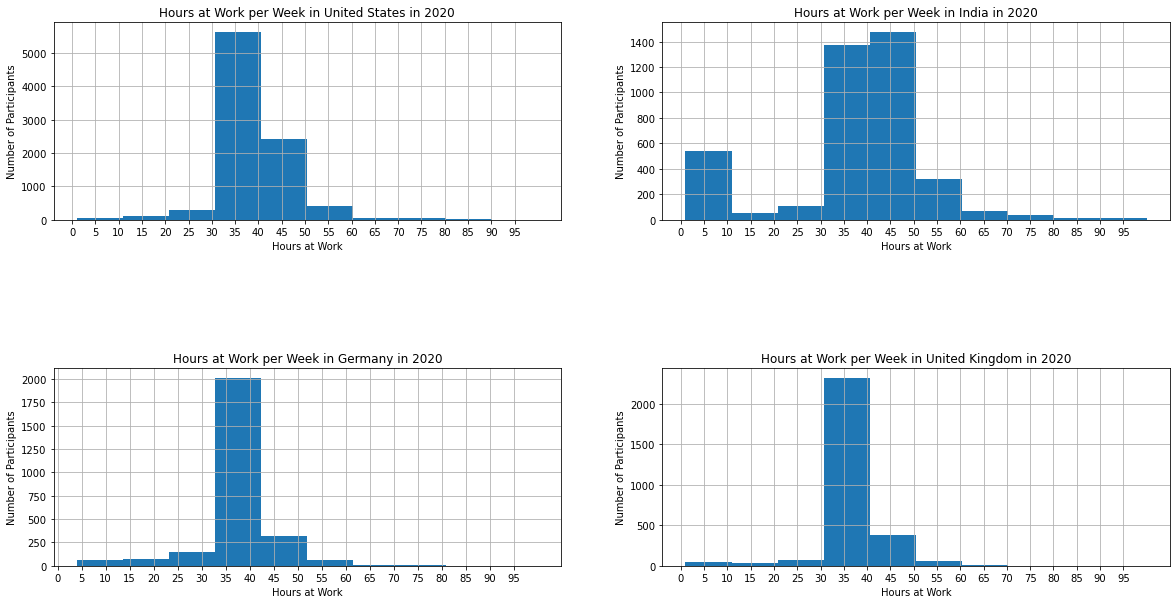

In [14]:
# Set up a figure
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Set up subplots
plt.subplot(2, 2, 1)
fun.plot_workinghours_per_week(df_2020,'United States',100)
plt.xticks(np.arange(0,100,5))

plt.subplot(2, 2, 2)
fun.plot_workinghours_per_week(df_2020,'India',100)
plt.xticks(np.arange(0,100,5))

plt.subplot(2, 2, 3)
fun.plot_workinghours_per_week(df_2020,'Germany',100)
plt.xticks(np.arange(0,100,5))

plt.subplot(2, 2, 4)
fun.plot_workinghours_per_week(df_2020,'United Kingdom',100)
plt.xticks(np.arange(0,100,5))

plt.savefig('results/WorkingHoursPerWeek_comparison.png')
plt.show()


You can see, that the most participants in the USA work between 31 and 50 hours a week, whereas in India there is a quite high amount of participants working in part-time or over 50 hours a week. Though the biggest amount of participants work between 31 and 50 hours per week. There is also a small group of people, which work more than 80 hours per week. Germany and the United Kingdom share a similar working attitude. In both countries the common working hours per week lie between 30 and 45.  

## Q4: How is the age demographics in different countries in 2020?

The average age in United States is 34.0
The average age in India is 26.0
The average age in Germany is 31.0
The average age in United Kingdom is 34.0


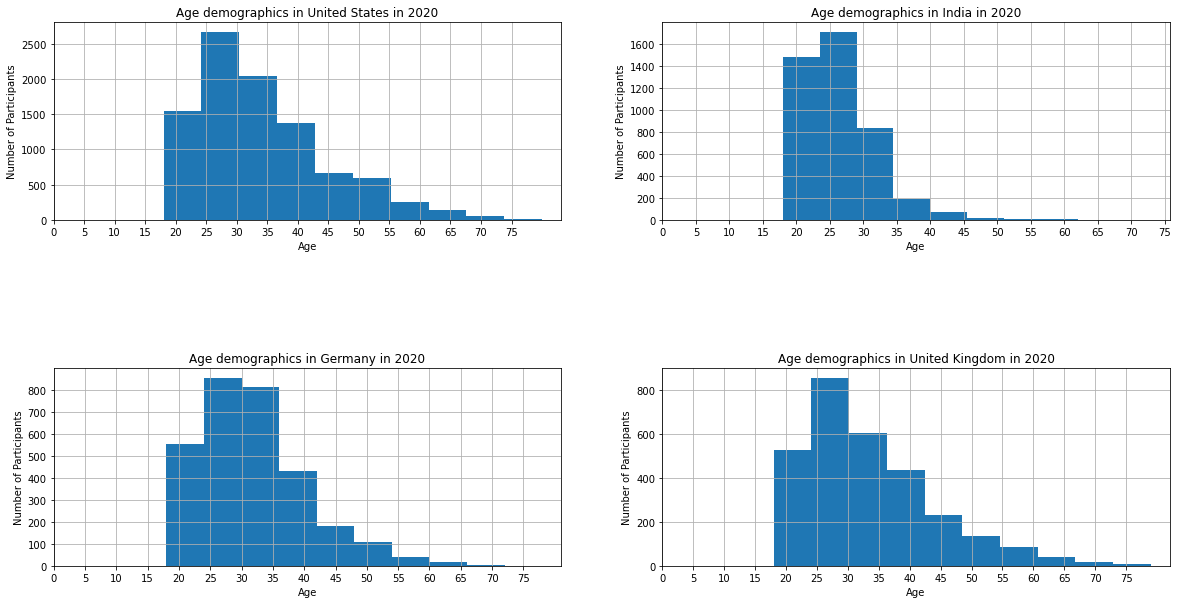

In [15]:
# Set up a figure
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.75)

# Set up subplots
plt.subplot(2, 2, 1)
fun.plot_age(df_2020,'United States',80)
plt.xticks(np.arange(0,80,5))

plt.subplot(2, 2, 2)
fun.plot_age(df_2020,'India',80)
plt.xticks(np.arange(0,80,5))

plt.subplot(2, 2, 3)
fun.plot_age(df_2020,'Germany',80)
plt.xticks(np.arange(0,80,5))

plt.subplot(2, 2, 4)
fun.plot_age(df_2020,'United Kingdom',80)
plt.xticks(np.arange(0,80,5))

plt.savefig('results/Age_demographics.png')
plt.show()


The age demographics show that the participants in the USA range between 18 and about 75. The highest amount of participants are between 18 and 40. In India the main age demographic group is between 18 and 30 years and the averag age is 26. The distribution of the age in Germany looks similar to the age distribution of the USA but the average age is a bit lower. In the United Kingdom the highest concentration of the participants lies between 25 and 30 but the average age is similar to the USA.  

## Resources

- https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
- https://stackoverflow.com/questions/5094083/find-the-overlap-between-2-python-lists
- https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
- https://www.wikihow.com/Write-a-Read-Me
- https://datatofish.com/if-condition-in-pandas-dataframe/
- https://stackoverflow.com/questions/45522723/how-to-color-bars-of-a-distribution-plot-using-gradient-colors
- https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python
- https://www.geeksforgeeks.org/create-and-import-modules-in-python/
- https://www.bing.com/search?q=explanatory+analysis+definition&cvid=e3b7dba0d1f94db69271c42ba38752bf&pglt=43&FORM=ANNTA1&PC=U531
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
- https://stackoverflow.com/questions/16211703/how-to-make-a-folder-in-python-mkdir-makedirs-doesnt-do-this-right
- https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory